In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, \
            classification_report, f1_score, multilabel_confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay


In [2]:
header = ["id", "age", "gender", "education", "country", "ethnicity", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc", "coke", "crack", "ecstasy", \
          "heroin", "ketamine", "legallh", "lsd", "meth", "mushroom", "nicotine", "semer", "vsa"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", names=header)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
semer_consummer_index = df.loc[df["semer"] != "CL0"].index

print("Nombre de personnes ayant indiqué avoir consommé la drogue fictive : ", semer_consummer_index.size)

df.drop(index = semer_consummer_index, inplace = True)

Nombre de personnes ayant indiqué avoir consommé la drogue fictive :  8


In [4]:
df.drop(["id", "ethnicity"], axis=1, inplace=True)
df

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [5]:
df.index = range(df.shape[0])
df

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1873,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1874,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1875,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [6]:
age = {
    -0.95197: "18-24",
    -0.07854: "25-34",
    0.49788: "35-44",
    1.09449: "45-54",
    1.82213: "55-64",
    2.59171: "65+",
}
gender = {-0.48246: "male", 0.48246: "female"}
education = {
    -2.43591: "left school before 16",
    -1.7379: "left school at 16",
    -1.43719: "left school at 17",
    -1.22751: "left school at 18",
    -0.61113: "left college without degree",
    -0.05921: "professionnal certificate",
    0.45468: "university degree",
    1.16365: "master degree",
    1.98437: "doctorate degree",
}
country = {
    -0.57009: "USA",
    -0.46841: "New Zealand",
    -0.28519: "Other",
    -0.09765: "Australia",
    0.21128: "Republic of Ireland",
    0.24923: "Canada",
    0.96082 : "UK",
}

In [7]:
def map_values(df):
  df["age"] = df["age"].map(age)
  df["gender"] = df["gender"].map(gender)
  df["education"] = df["education"].map(education)
  df["country"] = df["country"].map(country)
  return df
df = map_values(df.copy())
df

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1873,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1874,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1875,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [8]:
def CL_to_binary_class(cl):
    if(cl=="CL0" or cl=="CL1" or cl=="CL2"):
        return -1
    else:
        return 1
    

drugs_illegal = ["amphet", "amyl", "benzos", "cannabis", "coke", "crack", "ecstasy", \
          "heroin", "ketamine", "legallh", "lsd", "meth", "mushroom", "nicotine", "vsa"]

df_drugs = df[drugs_illegal]
for drug in drugs_illegal:
    df_drugs[drug] = df_drugs[drug].apply(CL_to_binary_class)
df_drugs

/tmp/ipykernel_6383/1056124039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drugs[drug] = df_drugs[drug].apply(CL_to_binary_class)


,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,vsa
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1
2,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1
1873,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,1,1,1,-1
1874,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,-1,1,-1
1875,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,-1


In [9]:
df_features = df.drop(drugs_illegal, axis=1)
df_features.drop(["alcohol", "caff", "choc", "semer"], axis=1, inplace=True)
df_features

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking
0,35-44,female,professionnal certificate,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,25-34,male,doctorate degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,35-44,male,professionnal certificate,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,18-24,female,master degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,35-44,female,doctorate degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...
1872,18-24,female,left college without degree,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1873,18-24,male,left college without degree,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1874,25-34,female,university degree,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1875,18-24,female,left college without degree,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [10]:
# perform one-hot encoding on categorical features
categorical_features = ['age', 'gender', 'education', 'country']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_features[categorical_features])
df_features_encoded = pd.DataFrame(enc.transform(df_features[categorical_features]).toarray(), columns=enc.get_feature_names_out())
# combine the one-hot encoded features with the numerical features
df_features = pd.concat([df_features.drop(categorical_features, axis=1), df_features_encoded ], axis=1)
df_features

,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,age_18-24,age_25-34,age_35-44,...,education_master degree,education_professionnal certificate,education_university degree,country_Australia,country_Canada,country_New Zealand,country_Other,country_Republic of Ireland,country_UK,country_USA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1873,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1874,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1875,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
X = df_features
y = df_drugs

In [12]:
features = X.columns
standardScaler = StandardScaler()
standardScaler.fit(X)
X = standardScaler.transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.313994,-0.575137,-0.582752,-0.919622,-0.006272,-0.233164,-1.220015,-0.716735,-0.586168,2.070585,...,-0.421356,2.439642,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,0.893248,-0.644620
1,-0.678937,1.946355,1.445164,0.764351,-0.142748,-0.751188,-0.216613,-0.716735,1.705994,-0.482955,...,-0.421356,-0.409896,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,0.893248,-0.644620
2,-0.467551,0.809487,-0.847975,-1.626059,-1.016758,-1.452073,0.425119,-0.716735,-0.586168,2.070585,...,-0.421356,2.439642,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,0.893248,-0.644620
3,-0.148540,-0.806496,-0.016130,0.593199,0.586815,-1.452073,-1.220015,1.395215,-0.586168,-0.482955,...,2.373291,-0.409896,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,0.893248,-0.644620
4,0.737346,-1.636109,-0.450577,-0.302143,1.309931,-0.233164,-0.216613,-0.716735,-0.586168,2.070585,...,-0.421356,-0.409896,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,0.893248,-0.644620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1.195930,1.747839,1.897011,0.764351,-1.140461,0.918170,2.005720,1.395215,-0.586168,-0.482955,...,-0.421356,-0.409896,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,-1.119509,1.551301
1873,-0.246388,1.747839,0.589229,0.764351,-1.521976,0.918170,0.803486,1.395215,-0.586168,-0.482955,...,-0.421356,-0.409896,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,-1.119509,1.551301
1874,1.135432,-1.378365,-1.278153,-1.777701,-1.388248,0.549806,-0.539107,-0.716735,1.705994,-0.482955,...,-0.421356,-0.409896,1.710783,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,-1.119509,1.551301
1875,0.913147,-1.925262,0.297967,-1.626059,-2.579425,1.349119,1.281019,1.395215,-0.586168,-0.482955,...,-0.421356,-0.409896,-0.584528,-0.168799,-0.220462,-0.051681,-0.259005,-0.103779,-1.119509,1.551301


In [13]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

In [14]:
y_valid

,amphet,amyl,benzos,cannabis,coke,crack,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,vsa
157,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
55,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
990,-1,-1,1,1,-1,-1,1,-1,1,1,1,-1,1,1,-1
869,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
907,1,-1,1,1,1,-1,1,1,-1,-1,-1,1,-1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1
612,1,-1,1,1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1
644,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
77,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1


In [15]:
drugs_illegal

['amphet',
 'amyl',
 'benzos',
 'cannabis',
 'coke',
 'crack',
 'ecstasy',
 'heroin',
 'ketamine',
 'legallh',
 'lsd',
 'meth',
 'mushroom',
 'nicotine',
 'vsa']

In [16]:
dict_weights = [{-1:1, 1:1} for i in range(len(drugs_illegal))]
dict_weights[drugs_illegal.index("meth")] = {-1:1, 1:1}
dict_weights

[{-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1},
 {-1: 1, 1: 1}]

## Decision Tree

balanced accuracy mean : 0.599125


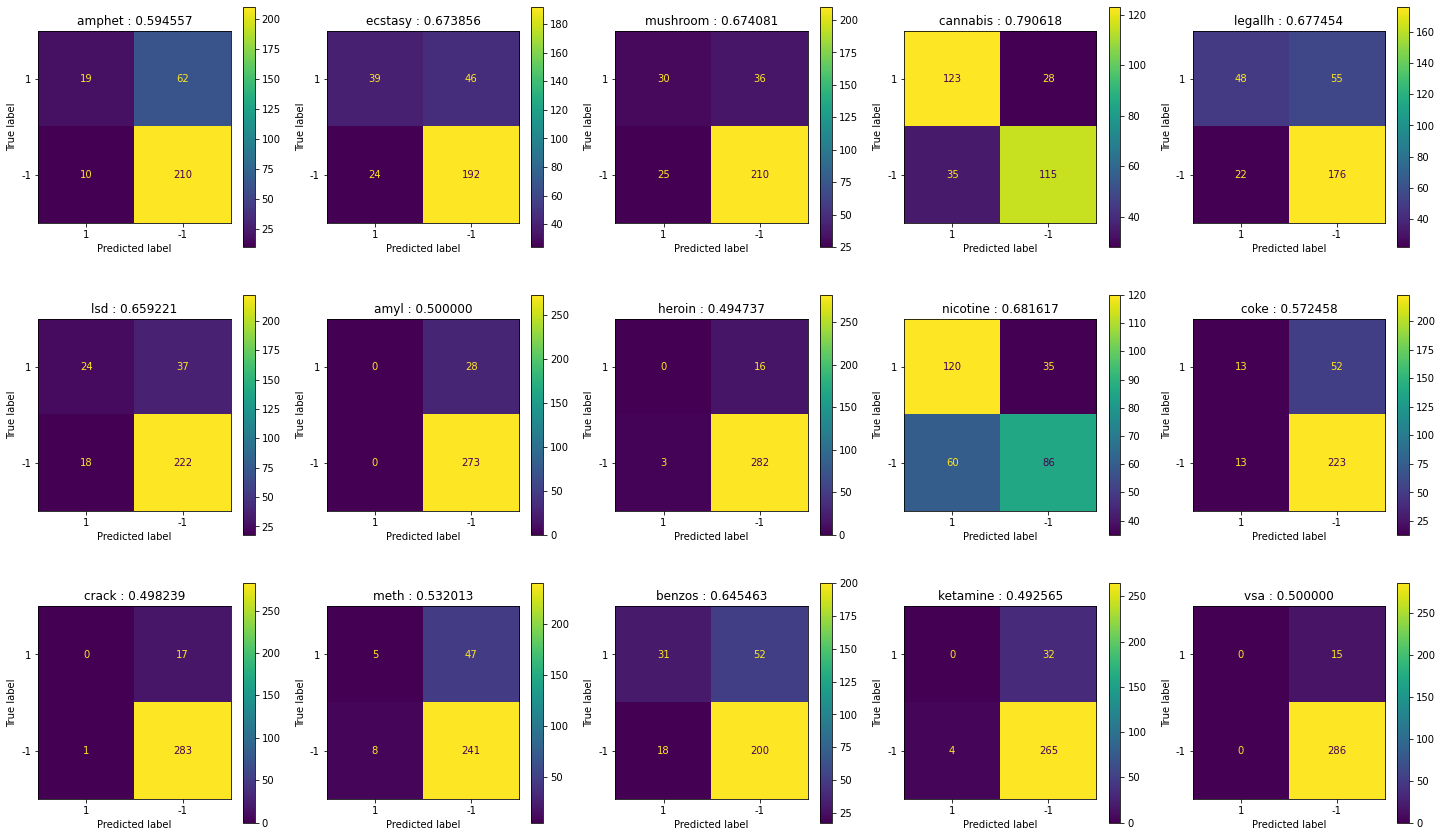

In [17]:
clf = DecisionTreeClassifier(max_leaf_nodes=50, class_weight=dict_weights, max_features='sqrt')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

valid = np.array(y_valid)

fig, axs = plt.subplots(3, 5, figsize=(25, 15))

balanced_acc = np.zeros(15)
for i in range(len(drugs_illegal)):
    balanced_acc[i] = balanced_accuracy_score(valid.T[i], y_pred.T[i])
    ConfusionMatrixDisplay.from_predictions(valid.T[i], y_pred.T[i], ax=axs[i%3][i%5], labels=[1, -1])
    axs[i%3][i%5].set_title("%s : %f" % (drugs_illegal[i], balanced_acc[i]))

print("balanced accuracy mean : %f" % balanced_acc.mean())

#fig, ax = plt.subplots(figsize=(30, 40))
#tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=features)
pass

## Random Forest

balanced accuracy mean : 0.605363
roc auc mean : 0.605363


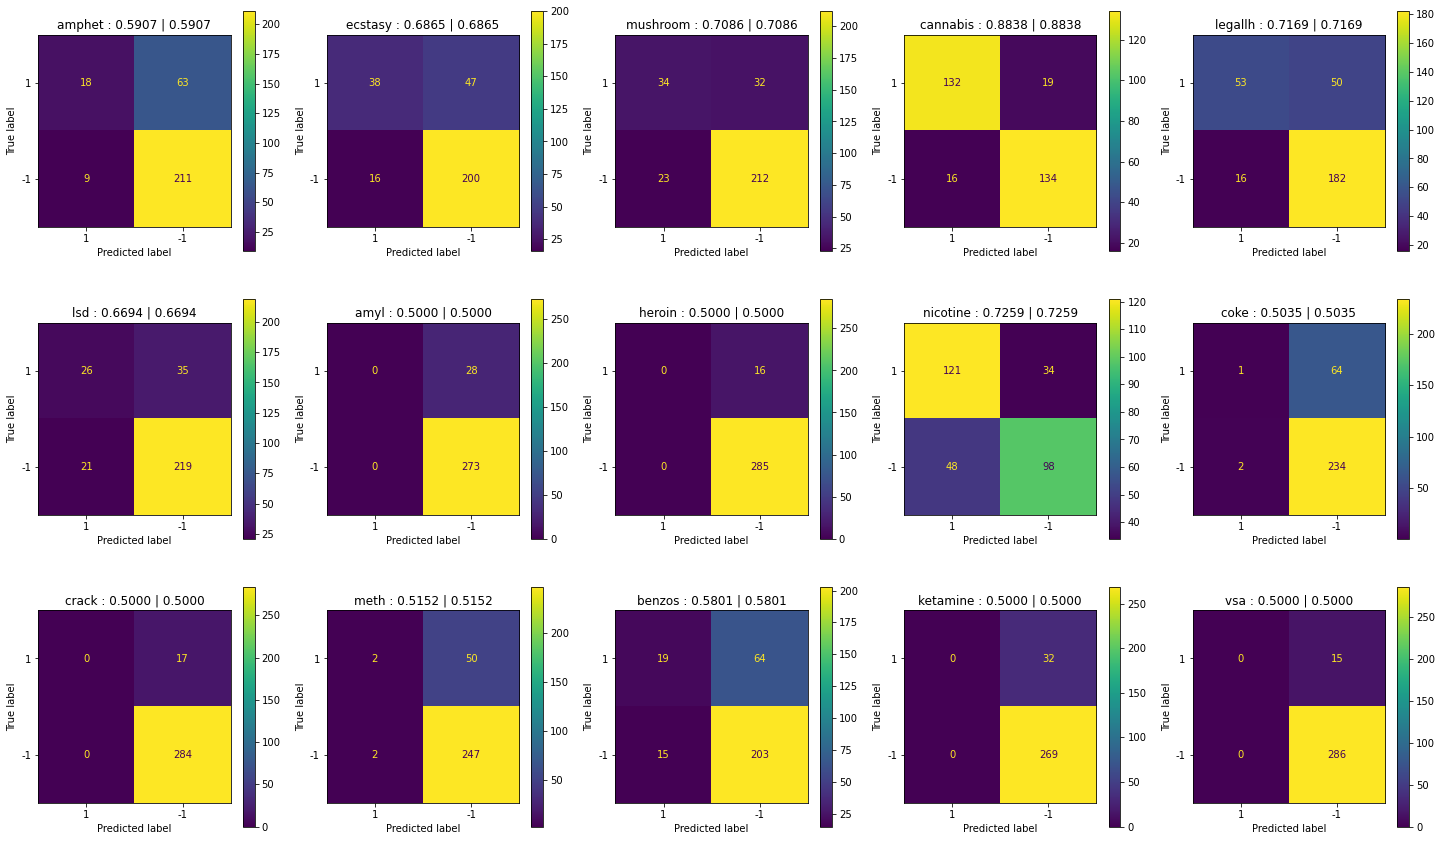

In [18]:
prof_max = 50

clf = RandomForestClassifier(n_estimators=100,
                             max_depth=prof_max, 
                             class_weight=dict_weights,
                              min_samples_leaf=5, 
                              max_leaf_nodes=50, 
                              n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

valid = np.array(y_valid)

fig, axs = plt.subplots(3, 5, figsize=(25, 15))

balanced_acc = np.zeros(15)
roc_auc = np.zeros(15)
for i in range(len(drugs_illegal)):
    balanced_acc[i] = balanced_accuracy_score(valid.T[i], y_pred.T[i])
    roc_auc[i] = roc_auc_score(valid.T[i], y_pred.T[i])
    ConfusionMatrixDisplay.from_predictions(valid.T[i], y_pred.T[i], ax=axs[i%3][i%5], labels=[1, -1])
    axs[i%3][i%5].set_title("%s : %.4f | %.4f" % (drugs_illegal[i], balanced_acc[i], roc_auc[i]))

print("balanced accuracy mean : %f" % balanced_acc.mean())
print("roc auc mean : %f" % roc_auc.mean())

#fig, ax = plt.subplots(figsize=(30, 40))
#tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=features)
pass

### Test d'hyper-paramètres

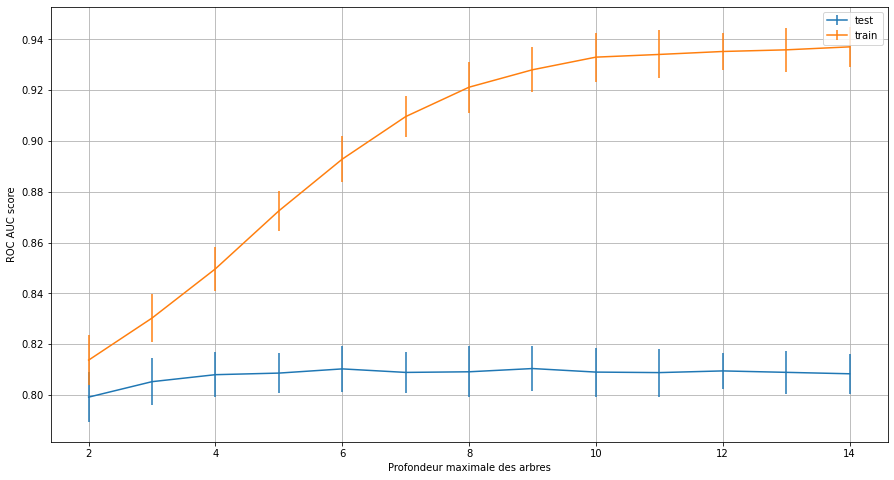

In [19]:
roc_auc_test_mean = np.zeros(13)
roc_auc_train_mean = np.zeros(13)
roc_auc_test_std = np.zeros(13)
roc_auc_train_std = np.zeros(13)
valid = np.array(y_valid)
train_true = np.array(y_train)

scoring = ["roc_auc"]

for prof_max in range(2, 15):
    clf = RandomForestClassifier(n_estimators=100,
                                max_depth=prof_max, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                #max_leaf_nodes=50, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[prof_max-2] = result["test_roc_auc"].mean()
    roc_auc_train_mean[prof_max-2] = result["train_roc_auc"].mean()
    roc_auc_test_std[prof_max-2] = result["test_roc_auc"].std()
    roc_auc_train_std[prof_max-2] = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(range(2, 15)), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(range(2, 15)), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Profondeur maximale des arbres")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


36


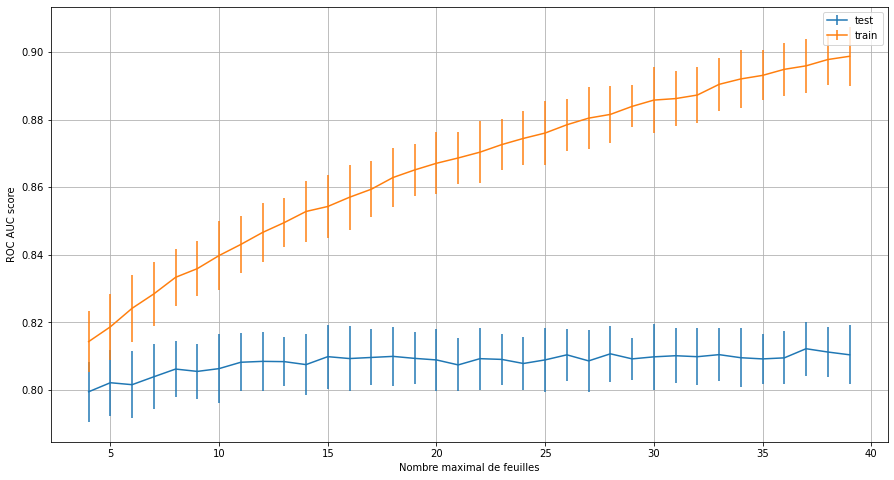

In [20]:
n = len(range(4, 40))
print(n)

roc_auc_test_mean = np.zeros(n)
roc_auc_train_mean = np.zeros(n)
roc_auc_test_std = np.zeros(n)
roc_auc_train_std = np.zeros(n)

scoring = ["roc_auc"]

for nb_feuille in range(4, 40):
    clf = RandomForestClassifier(n_estimators=100,
                                #max_depth=prof_max, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                max_leaf_nodes=nb_feuille, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[nb_feuille-4] = result["test_roc_auc"].mean()
    roc_auc_train_mean[nb_feuille-4]  = result["train_roc_auc"].mean()
    roc_auc_test_std[nb_feuille-4]  = result["test_roc_auc"].std()
    roc_auc_train_std[nb_feuille-4]  = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(range(4, 40)), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(range(4, 40)), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Nombre maximal de feuilles")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


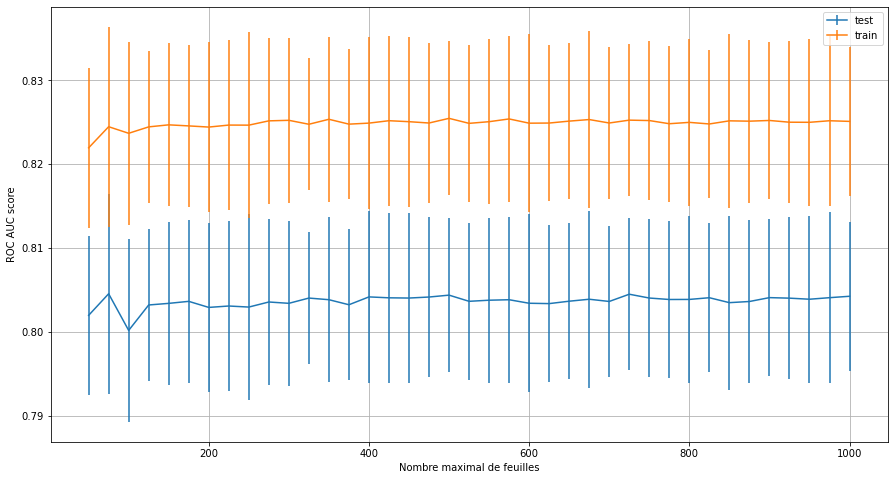

In [21]:
intervalle = range(50, 1001, 25)
n = len(intervalle)

roc_auc_test_mean = np.zeros(n)
roc_auc_train_mean = np.zeros(n)
roc_auc_test_std = np.zeros(n)
roc_auc_train_std = np.zeros(n)

scoring = ["roc_auc"]

for nb_tree in intervalle:
    clf = RandomForestClassifier(n_estimators=nb_tree,
                                max_depth=4, 
                                class_weight=dict_weights,
                                min_samples_leaf=5, 
                                max_leaf_nodes=6, 
                                n_jobs=-1)


    result = cross_validate(clf, X_train_valid, y_train_valid, cv=5, n_jobs=-1, scoring = scoring, return_train_score=True)

    roc_auc_test_mean[int(nb_tree/25) - 2] = result["test_roc_auc"].mean()
    roc_auc_train_mean[int(nb_tree/25) - 2]  = result["train_roc_auc"].mean()
    roc_auc_test_std[int(nb_tree/25) - 2]  = result["test_roc_auc"].std()
    roc_auc_train_std[int(nb_tree/25) - 2]  = result["train_roc_auc"].std()

fig, ax = plt.subplots(figsize=(15, 8))

ax.errorbar(list(intervalle), roc_auc_test_mean, roc_auc_test_std, label="test")
ax.errorbar(list(intervalle), roc_auc_train_mean, roc_auc_test_std, label="train")
ax.set_xlabel("Nombre maximal de feuilles")
ax.set_ylabel("ROC AUC score")
ax.legend()
ax.grid()

pass


### X_test

balanced accuracy mean : 0.561850
roc auc mean : 0.561850


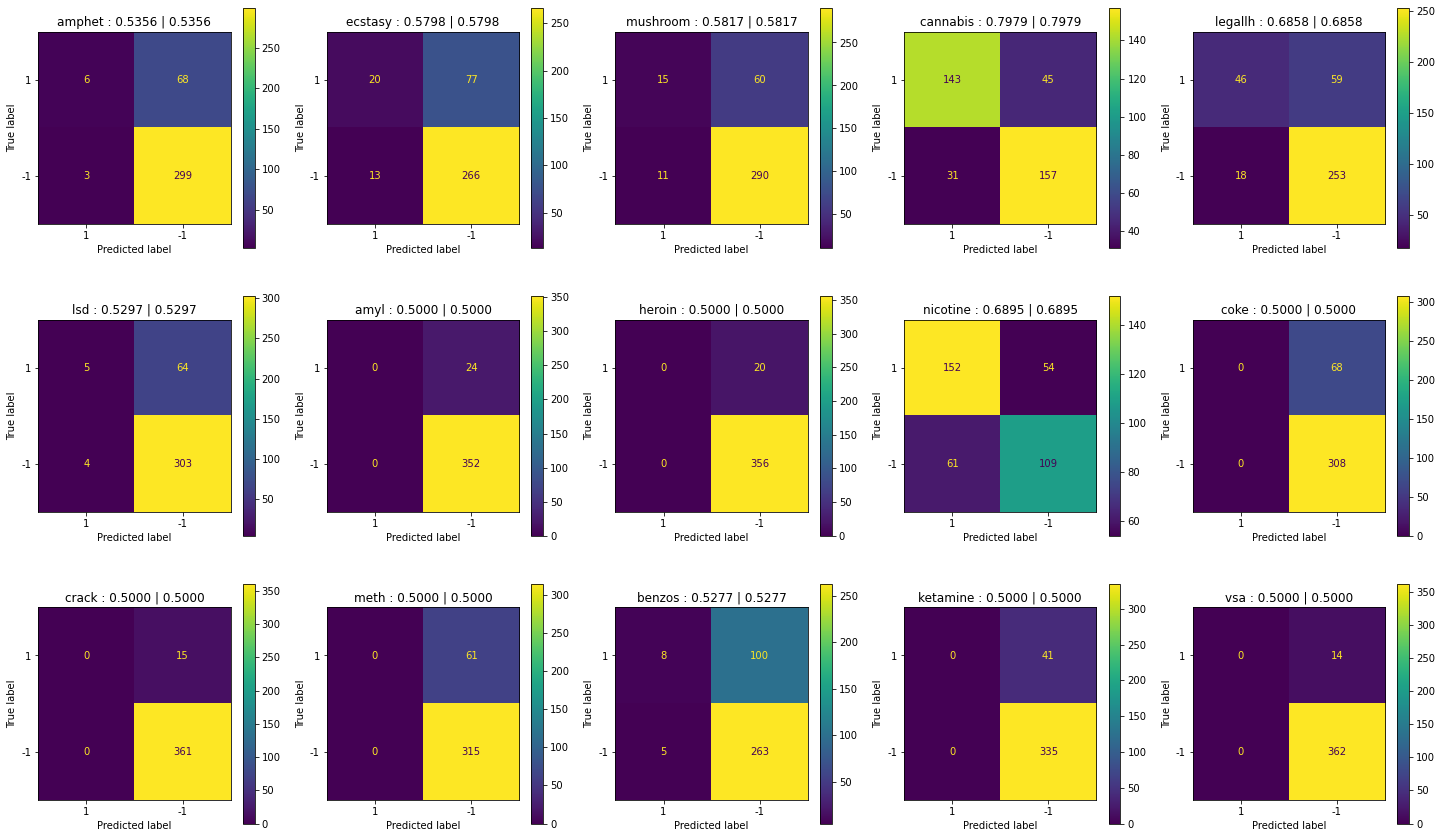

In [24]:

clf = RandomForestClassifier(n_estimators=75,
                             max_depth=4, 
                             class_weight=dict_weights,
                              min_samples_leaf=5, 
                              max_leaf_nodes=11, 
                              n_jobs=-1)
clf.fit(X_train_valid, y_train_valid)
y_pred = clf.predict(X_test)

valid = np.array(y_test)

fig, axs = plt.subplots(3, 5, figsize=(25, 15))

balanced_acc = np.zeros(15)
roc_auc = np.zeros(15)
for i in range(len(drugs_illegal)):
    balanced_acc[i] = balanced_accuracy_score(valid.T[i], y_pred.T[i])
    roc_auc[i] = roc_auc_score(valid.T[i], y_pred.T[i])
    ConfusionMatrixDisplay.from_predictions(valid.T[i], y_pred.T[i], ax=axs[i%3][i%5], labels=[1, -1])
    axs[i%3][i%5].set_title("%s : %.4f | %.4f" % (drugs_illegal[i], balanced_acc[i], roc_auc[i]))

print("balanced accuracy mean : %f" % balanced_acc.mean())
print("roc auc mean : %f" % roc_auc.mean())
pass